<a href="https://colab.research.google.com/github/HarshitaBhatia27/Deep-Learning-/blob/main/Implementation_of_ANN_with_callback_functions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code we have used callback functions to improve the model **performance**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
print(f"tensorflow version {tf.__version__}")
print(f"keras version {tf.keras.__version__}")

tensorflow version 2.12.0
keras version 2.12.0


In [ ]:
os.getcwd() #current directory

'/content'

In [ ]:
#GPU/CPU check
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list=['GPU','CPU']

for device in check_list:
  out= tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available")
    print(f"Details >> {out } ")
  else:
    print(f" {device} isn't available ")

GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] 


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28)


In [ ]:
#create a validation data set from full training data
#scale the data b/w 0 to 1 by dividing it by 255, as it is unsigned and range of unsinged is 0 to 25
X_valid, X_train= X_train_full[:5000]/ 255.,X_train_full[5000:] / 255.
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]

#scale the test set as well
X_test = X_test/ 255.

In [ ]:
len(X_train_full[5000:])

55000

In [ ]:
len(y_train_full[5000:])

55000

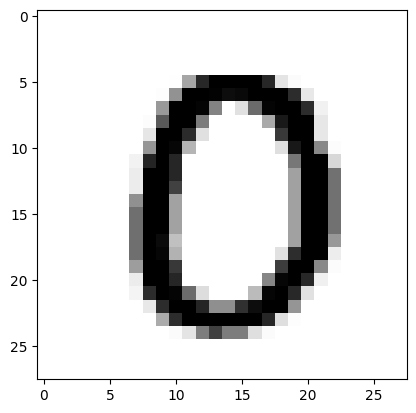

In [ ]:
plt.imshow(X_train[10],cmap="binary")
plt.show()

<Axes: >

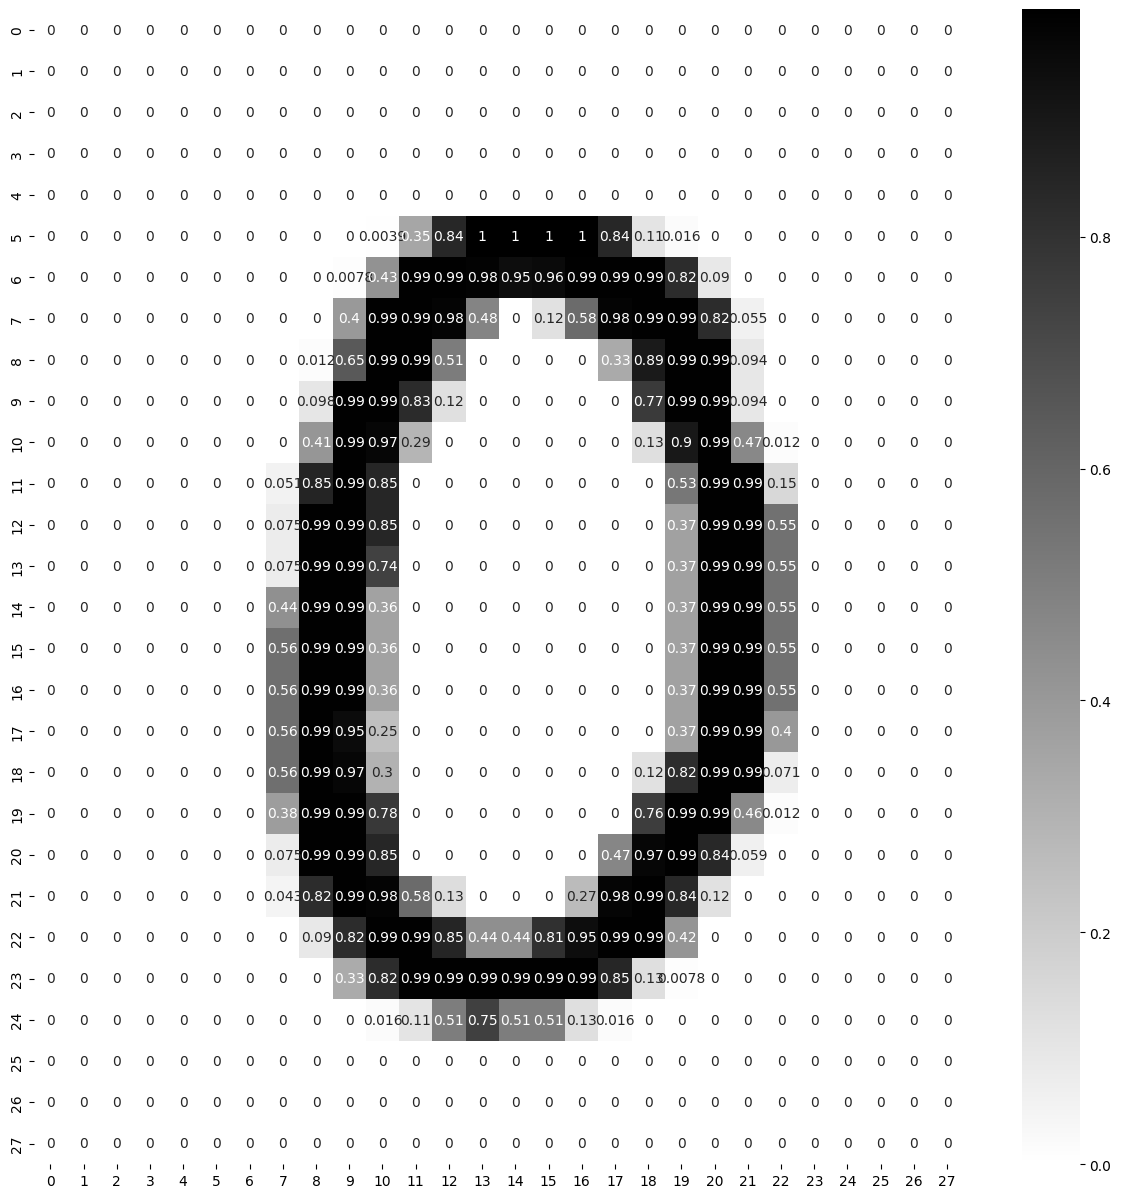

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[10],annot=True,cmap="binary")

In [ ]:
#creating layers for ANN (defining neural network)
layers= [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
         tf.keras.layers.Dense(300,activation="relu", name="hiddenLayer1"),
         tf.keras.layers.Dense(100,activation="relu", name="hiddenLayer2"),
         tf.keras.layers.Dense(10,activation="softmax", name="outputlayer")]

model_clf= tf.keras.models.Sequential(layers)


In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
hidden1.get_weights()
#gives 2 arrays: first represent initial weights and second represents initial

[array([[ 0.00964586, -0.02355853,  0.00707652, ..., -0.01092036,
          0.00145587,  0.04491246],
        [ 0.06105851, -0.06173231, -0.06945714, ...,  0.0079657 ,
         -0.0586037 , -0.03037308],
        [ 0.02333935,  0.06636007,  0.03942554, ..., -0.01322722,
          0.00331902, -0.02504252],
        ...,
        [-0.03705349,  0.03690562,  0.06189585, ...,  0.02393072,
         -0.01912618, -0.02977341],
        [ 0.00320823,  0.03455481,  0.02763783, ...,  0.03406724,
         -0.01972536,  0.040378  ],
        [-0.03499164, -0.07020923,  0.0263049 , ...,  0.00814572,
          0.05898106, -0.06410246]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases= hidden1.get_weights() #size of inputs and bias

In [ ]:
weights.shape

(784, 300)

In [ ]:
Loss_function= "sparse_categorical_crossentropy"
optimiser="SGD"
metrics=['accuracy']

model_clf.compile(loss=Loss_function, optimizer=optimiser,metrics=metrics)

TensorBoard Callback Functions

In [ ]:
#logging

import time
def get_log_path(log_dir="logs/fit"):
  fileName= time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path= os.path.join(log_dir, fileName)
  print(f" Saving logs at {logs_path}")
  return logs_path

log_dir= get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


 Saving logs at logs/fit/log_2023_08_11_18_50_14


Early Stopping callback

In [ ]:
early_stopping_cb= tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

Model Checkpoint callback

In [ ]:
ckpt_path='Model_ckpt.h5'
checkpoint_cb= tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True)

In [ ]:
epochs=30
validation_set= (X_valid,y_valid)

In [ ]:
history=model_clf.fit(X_train,y_train,epochs=epochs,validation_data=validation_set,batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpoint_cb])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2371 - accuracy: 0.9327 - val_loss: 0.2121 - val_accuracy: 0.9426
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2023 - accuracy: 0.9421 - val_loss: 0.1824 - val_accuracy: 0.9490
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1763 - accuracy: 0.9490 - val_loss: 0.1615 - val_accuracy: 0.9544
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1565 - accuracy: 0.9551 - val_loss: 0.1475 - val_accuracy: 0.9560
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1398 - accuracy: 0.9596 - val_loss: 0.1351 - val_accuracy: 0.9602
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1262 - accuracy: 0.9640 - val_loss: 0.1272 - val_accuracy: 0.9640
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1149 - accuracy: 0.9670 - val_loss: 0.1158 - val_accuracy:

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0707 - accuracy: 0.9782


[0.0707123875617981, 0.9782000184059143]

In [ ]:
X_new=X_test[10:15]

In [ ]:
actual=y_test[10:15]
actual

array([0, 6, 9, 0, 1], dtype=uint8)

In [ ]:
y_prob=model_clf.predict(X_new)  #it will give 3 arrays because we have taken 3 points to test. each array will contain prob of number 0 to 9. Whichever index has max prob, that will be our ans
y_prob.round(3)

1/1 [==============================] - 0s 22ms/step


array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)

In [ ]:
y_pred

array([0, 6, 9, 0, 1])

In [ ]:
actual

array([0, 6, 9, 0, 1], dtype=uint8)

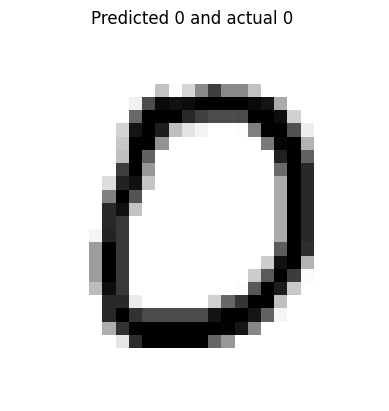

************************


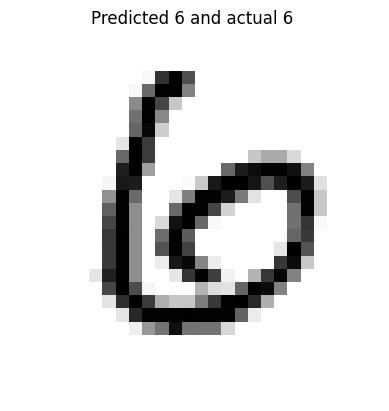

************************


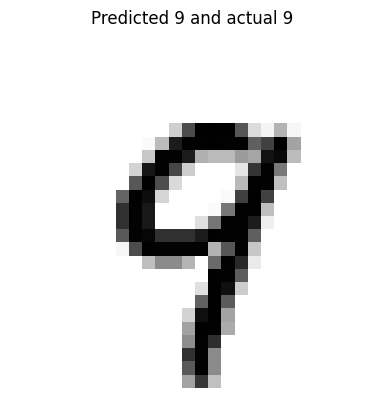

************************


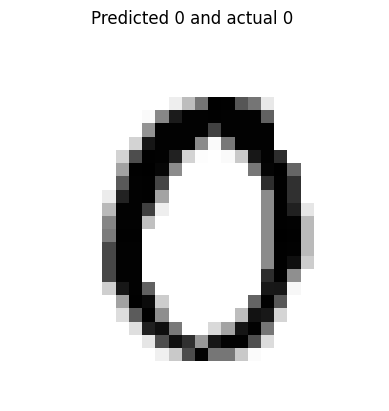

************************


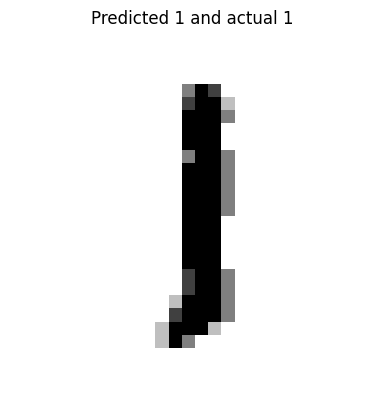

************************


In [ ]:
#plot
for data,pred,actual_data in zip(X_new,y_pred,actual):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted {pred} and actual {actual_data} ")
  plt.axis("off")
  plt.show()
  print("************************")